In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_context('poster')
sns.set_style('dark')
sns.set(rc={"figure.figsize":(12, 5)})

In [3]:
store = pd.read_csv("../input/urack-dataset/store.csv")

In [4]:
store.head(3)

,StoreID,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
0,1,type3,Essentials,0,NaN,NaN,1270.0,9.0,2008.0
1,2,type1,Essentials,1,13.0,2010.0,570.0,11.0,2007.0
2,3,type1,Essentials,1,14.0,2011.0,14130.0,12.0,2006.0


In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StoreID              1115 non-null   int64  
 1   LocalityType         1115 non-null   object 
 2   ProductMix           1115 non-null   object 
 3   PromoCont            1115 non-null   int64  
 4   PromoContStartWeek   571 non-null    float64
 5   PromoContStartYear   571 non-null    float64
 6   CompetitionDistance  1112 non-null   float64
 7   CompetitionMonth     761 non-null    float64
 8   CompetitionYear      761 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 78.5+ KB


<AxesSubplot:>

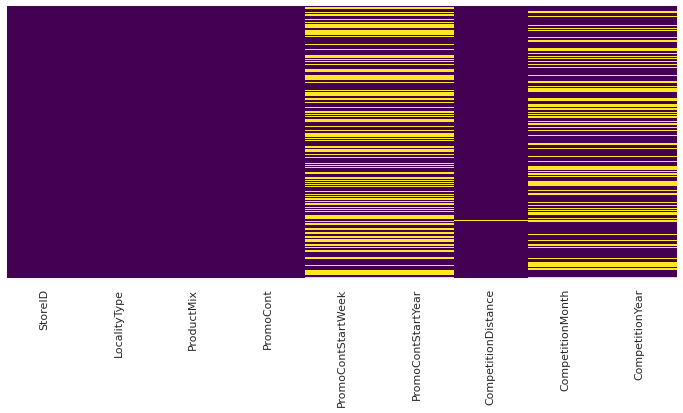

In [6]:
sns.heatmap(store.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [7]:
store.shape[0]

1115

In [8]:
store[(store['PromoCont']== 0) & (store['PromoContStartWeek'].isnull())].shape[0]

544

In [9]:
store[(store['PromoCont']== 0) & (store['PromoContStartYear'].isnull())].shape[0]

544

#### The number of missing values in PromoContStartWeek and PromoContStartWeek is equals to the number of values equals to 0 in PromoCont , i.e. 544 . Hence, replace all NAN with 0. 

In [10]:
store['PromoContStartWeek'].fillna(value=0,inplace=True)

In [11]:
store['PromoContStartYear'].fillna(value=0,inplace=True)

<AxesSubplot:>

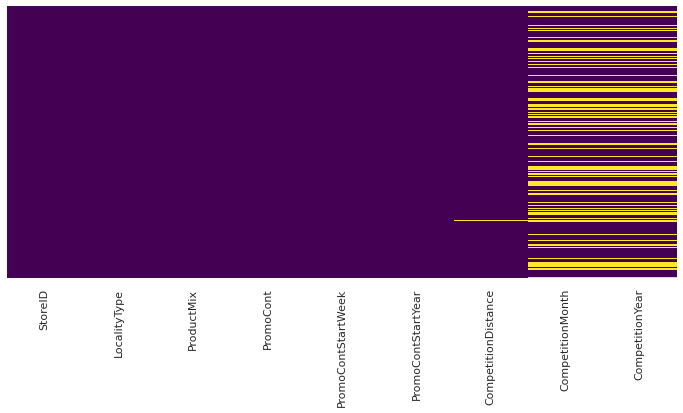

In [12]:
sns.heatmap(store.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [13]:
store[(store['CompetitionMonth'].isna()) & (store['CompetitionYear'].isna())].shape[0]

354

In [14]:
store.head(2)

,StoreID,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
0,1,type3,Essentials,0,0.0,0.0,1270.0,9.0,2008.0
1,2,type1,Essentials,1,13.0,2010.0,570.0,11.0,2007.0


In [15]:
store.describe()

,StoreID,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1112.000000,761.000000,761.000000
mean,558.00000,0.512108,12.083408,1030.239462,5404.901079,7.224704,2008.668857
std,322.01708,0.500078,15.542241,1006.038782,7663.174720,3.212348,6.195983
min,1.00000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000
25%,279.50000,0.000000,0.000000,0.000000,717.500000,4.000000,2006.000000
50%,558.00000,1.000000,1.000000,2009.000000,2325.000000,8.000000,2010.000000
75%,836.50000,1.000000,22.000000,2012.000000,6882.500000,10.000000,2013.000000
max,1115.00000,1.000000,50.000000,2015.000000,75860.000000,12.000000,2015.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CompetitionDistance', ylabel='CompetitionMonth'>

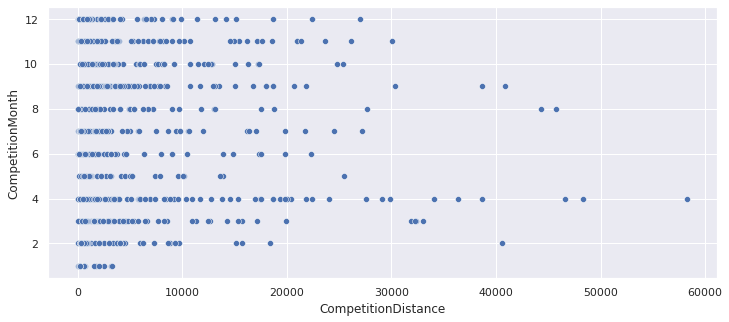

In [16]:
sns.scatterplot('CompetitionDistance','CompetitionMonth',data=store)

In [17]:
store['LocalityType'].unique()

array(['type3', 'type1', 'type4', 'type2'], dtype=object)

In [18]:
store[store['CompetitionMonth'].isnull()]

,StoreID,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
11,12,type1,LargeVariety,1,13.0,2010.0,1070.0,NaN,NaN
12,13,type4,Essentials,1,45.0,2009.0,310.0,NaN,NaN
15,16,type1,LargeVariety,0,0.0,0.0,3270.0,NaN,NaN
18,19,type1,LargeVariety,1,22.0,2011.0,3240.0,NaN,NaN
21,22,type1,Essentials,1,22.0,2012.0,1040.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1095,1096,type1,LargeVariety,1,10.0,2014.0,1130.0,NaN,NaN
1099,1100,type1,Essentials,1,14.0,2011.0,540.0,NaN,NaN
1112,1113,type1,LargeVariety,0,0.0,0.0,9260.0,NaN,NaN
1113,1114,type1,LargeVariety,0,0.0,0.0,870.0,NaN,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompetitionMonth', ylabel='Density'>

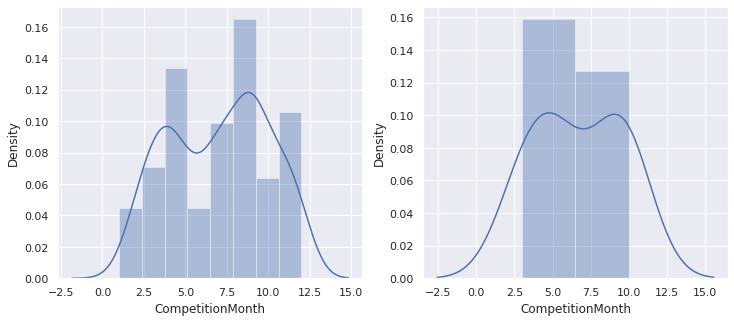

In [19]:
plt.subplot(1,2,1)
sns.distplot(store[(store['CompetitionMonth'].isnull()==False) & (store['LocalityType']=='type1')].groupby(['LocalityType','CompetitionDistance'])['CompetitionMonth'].mean())

plt.subplot(1,2,2)
sns.distplot(store[(store['CompetitionMonth'].isnull()==False) & (store['LocalityType']=='type2')].groupby(['LocalityType','CompetitionDistance'])['CompetitionMonth'].mean())


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompetitionMonth', ylabel='Density'>

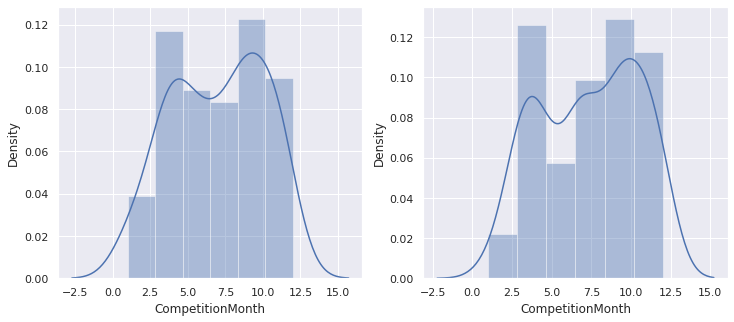

In [20]:
plt.subplot(1,2,1)
sns.distplot(store[(store['CompetitionMonth'].isnull()==False) & (store['LocalityType']=='type3')].groupby(['LocalityType','CompetitionDistance'])['CompetitionMonth'].mean())
plt.subplot(1,2,2)
sns.distplot(store[(store['CompetitionMonth'].isnull()==False) & (store['LocalityType']=='type4')].groupby(['LocalityType','CompetitionDistance'])['CompetitionMonth'].mean())


In [21]:
a = store[store['CompetitionMonth'].isnull()]['ProductMix']

In [22]:
a.value_counts()

LargeVariety      193
Essentials        155
EssentialsPlus      6
Name: ProductMix, dtype: int64

<AxesSubplot:ylabel='Frequency'>

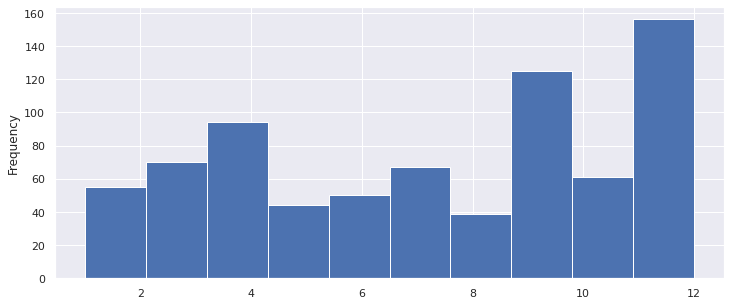

In [23]:
store['CompetitionMonth'].plot.hist()

In [24]:
store[store['CompetitionMonth'].isnull()== True].groupby('LocalityType').count()

,StoreID,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
LocalityType,,,,,,,,
type1,176,176,176,176,176,175,0,0
type2,8,8,8,8,8,8,0,0
type3,41,41,41,41,41,41,0,0
type4,129,129,129,129,129,127,0,0


In [25]:
'''def impute_C_Month(col):
    CM=col[0]
    type=col[1]
    if col[0].isnull():
        if col[1]=='type1':
            return 'a'
        elif col[1]=='type2':
            return 'b'
        else : return 'c'
    else: col[0]==col[0]      '''

"def impute_C_Month(col):\n    CM=col[0]\n    type=col[1]\n    if col[0].isnull():\n        if col[1]=='type1':\n            return 'a'\n        elif col[1]=='type2':\n            return 'b'\n        else : return 'c'\n    else: col[0]==col[0]      "

In [26]:
# fix the CompetitionMonth 
median_CM = store.groupby(['LocalityType'])['CompetitionMonth'].median()
display(median_CM)

LocalityType
type1    7.5
type2    6.0
type3    7.0
type4    8.0
Name: CompetitionMonth, dtype: float64

In [27]:
def replace_CM_(row):
    if pd.isnull(row['CompetitionMonth']):
        return median_CM[row['LocalityType']]
    else:
        return row['CompetitionMonth']

In [28]:
store['CompetitionMonth'] = store.apply(replace_CM_,axis = 1)

In [29]:
# fix the CompetitionYear
median_CY = store.groupby(['LocalityType'])['CompetitionYear'].median()
display(median_CY)
display(median_CY.shape)


LocalityType
type1    2010.0
type2    2008.0
type3    2009.0
type4    2010.0
Name: CompetitionYear, dtype: float64

(4,)

In [30]:
def replace_CY_(row):
    if pd.isnull(row['CompetitionYear']):
        return median_CY[row['LocalityType']]
    else:
        return row['CompetitionYear']

In [31]:
store['CompetitionYear'] = store.apply(replace_CY_,axis = 1)


In [32]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StoreID              1115 non-null   int64  
 1   LocalityType         1115 non-null   object 
 2   ProductMix           1115 non-null   object 
 3   PromoCont            1115 non-null   int64  
 4   PromoContStartWeek   1115 non-null   float64
 5   PromoContStartYear   1115 non-null   float64
 6   CompetitionDistance  1112 non-null   float64
 7   CompetitionMonth     1115 non-null   float64
 8   CompetitionYear      1115 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 78.5+ KB


In [33]:
store.isnull().sum()

StoreID                0
LocalityType           0
ProductMix             0
PromoCont              0
PromoContStartWeek     0
PromoContStartYear     0
CompetitionDistance    3
CompetitionMonth       0
CompetitionYear        0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

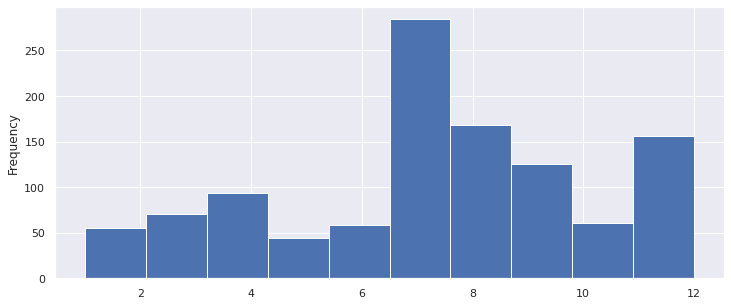

In [34]:
store['CompetitionMonth'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

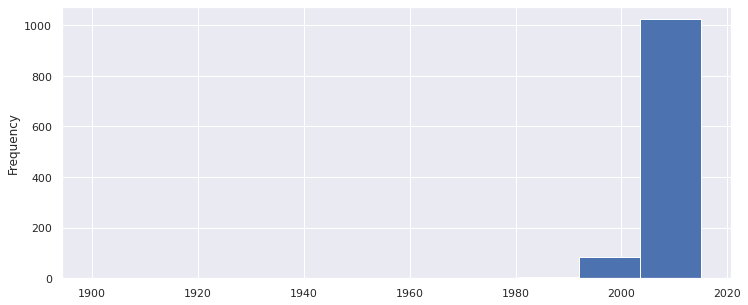

In [35]:
store['CompetitionYear'].plot.hist()

In [36]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StoreID              1115 non-null   int64  
 1   LocalityType         1115 non-null   object 
 2   ProductMix           1115 non-null   object 
 3   PromoCont            1115 non-null   int64  
 4   PromoContStartWeek   1115 non-null   float64
 5   PromoContStartYear   1115 non-null   float64
 6   CompetitionDistance  1112 non-null   float64
 7   CompetitionMonth     1115 non-null   float64
 8   CompetitionYear      1115 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 78.5+ KB


In [37]:
## store.dropna(subset=['CompetitionDistance'],inplace=True)

In [38]:
# store.isnull().sum()

In [39]:
cop_store = store.copy()

In [40]:
import train_data

ModuleNotFoundError: No module named 'train_data'

In [ ]:
train = train_data.train_store

In [ ]:
train

In [ ]:
train.columns

In [ ]:
store.columns

In [ ]:
store['StoreID'].nunique()

In [ ]:
train['StoreID'].nunique()

In [ ]:
store_merged_train = pd.merge(train, store, on='StoreID', how='left')

In [ ]:
store_merged_train.info()

In [ ]:
store_merged_train[store_merged_train['CompetitionDistance'].isnull()]['StoreID'].unique()

In [ ]:
store_merged_train[store_merged_train['CompetitionDistance'].isnull()].groupby('StoreID')['StoreID'].count()

In [ ]:
store_merged_train[store_merged_train['CompetitionDistance'].isnull()]['LocalityType']

In [ ]:
Mean_distance=[]
#def impute_distance():
for Loc_id in {'type1','type2','type3','type4'}:
    distance=round(store_merged_train.CompetitionDistance[store_merged_train['LocalityType']==Loc_id].mean(),2)
    print(Loc_id,"\n",distance)
  

In [ ]:
# fix the CompetitionDistance
mean_CD = store.groupby(['LocalityType'])['CompetitionDistance'].mean()
display(mean_CD)

In [ ]:
def replace_CD_(row):
    if pd.isnull(row['CompetitionDistance']):
        return mean_CD[row['LocalityType']]
    else:
        return row['CompetitionDistance']

In [ ]:
store_merged_train['CompetitionDistance']= store_merged_train.apply(replace_CD_,axis = 1)

In [ ]:
store_merged_train.info()

In [ ]:
store_merged_train['CompetitionYear'].plot.box()

# Pre-processing of Train - dataset 
#### Creating dummy variable 

In [ ]:
train_data = store_merged_train.copy()

In [ ]:
train_data.info()

In [ ]:
## pandas.DataFrame.loc[condition, column_label] = new_value
train_data.loc[train_data.HolidayFlag=='0','HolidayFlag']=0

In [ ]:
train_data.loc[train_data["HolidayFlag"]=="0","HolidayFlag"]=0
train_data.loc[train_data["HolidayFlag"]=="h1","HolidayFlag"]=1
train_data.loc[train_data["HolidayFlag"]=="h2","HolidayFlag"]=2
train_data.loc[train_data["HolidayFlag"]=="h3","HolidayFlag"]=3
train_data["HolidayFlag"]=train_data["HolidayFlag"].astype(int,copy=False)

In [ ]:
train_data['HolidayFlag'].unique()

In [ ]:
#Automize the factor process
def factor_to_integer(df, colname, start_value=0):
    while df[colname].dtype == object:
        myval = start_value # factor starts at "start_value".
        for sval in df[colname].unique():
            df.loc[df[colname] == sval, colname] = myval
            myval += 1
        df[colname] = df[colname].astype(int, copy=False)
    print('levels :', df[colname].unique(), '; data type :', df[colname].dtype)

In [ ]:
factor_to_integer(train_data,"LocalityType")

In [ ]:
factor_to_integer(train_data,"ProductMix")

In [ ]:
train_data['ProductMix'].unique()

In [ ]:
#train_data['HolidayFlag']=train_data['HolidayFlag'].replace(['0'],[0])

In [ ]:
#dummies_LocalityType= pd.get_dummies(data = train_data['LocalityType'],drop_first=True,prefix = 'LocalityType')

In [ ]:
#dummies_ProductMix= pd.get_dummies(data = train_data['ProductMix'],drop_first=True,prefix = 'ProductMix')

In [ ]:
#train_data= pd.concat([train_data,dummies_holiday,dummies_LocalityType,dummies_ProductMix],axis=1)

In [ ]:
#train_data.drop(['LocalityType','ProductMix','HolidayFlag'],axis=1,inplace=True)

In [ ]:
train_data['Date']

In [ ]:
train_data["Year"]=pd.DatetimeIndex(train_data["Date"]).year
train_data["Month"]=pd.DatetimeIndex(train_data["Date"]).month

In [ ]:
train_data['Day']= pd.DatetimeIndex(train_data["Date"]).day

In [ ]:
train_data.info(
)

In [ ]:
train_data = train_data.astype({'HolidayFlag': 'int64', 
                                'ProductMix':'int64','LocalityType':'int64'})

In [ ]:
train_data.info()

In [ ]:
train_data.drop('Date',axis=1,inplace=True)

In [ ]:
len(train_data.columns)

In [ ]:
train_data['Year']=train_data["Year"].max()-train_data["Year"]

In [ ]:
len(train_data.columns)

In [ ]:
train_data.head(2)

### Preprocessing of test -dataset 

In [ ]:
test= pd.read_csv('../input/urack-dataset/test.csv')

In [ ]:
test.head(2)

In [ ]:
store_merged_test = pd.merge(test, store, on='StoreID', how='left')

In [ ]:
store_merged_test.head(2)

In [ ]:
factor_to_integer(store_merged_test,"ProductMix")

In [ ]:
factor_to_integer(store_merged_test,"HolidayFlag")

In [ ]:
store_merged_test['Date'] = pd.to_datetime(store_merged_test['Date'],format='%d-%m-%Y')

In [ ]:
store_merged_test["Year"]=pd.DatetimeIndex(store_merged_test["Date"]).year
store_merged_test["Month"]=pd.DatetimeIndex(store_merged_test["Date"]).month
store_merged_test["Day"]= pd.DatetimeIndex(store_merged_test["Date"]).day

In [ ]:
store_merged_test['Year']=store_merged_test["Year"].max()-store_merged_test["Year"]

In [ ]:
store_merged_test.drop('Date',axis=1,inplace=True)

In [ ]:
# fix the CompetitionDistance
mean_CD = store.groupby(['LocalityType'])['CompetitionDistance'].mean()
display(mean_CD)

In [ ]:
def replace_CD_(row):
    if pd.isnull(row['CompetitionDistance']):
        return mean_CD[row['LocalityType']]
    else:
        return row['CompetitionDistance']

In [ ]:
store_merged_test['CompetitionDistance']= store_merged_test.apply(replace_CD_,axis = 1)

In [ ]:
factor_to_integer(store_merged_test,"LocalityType")

In [ ]:
store_merged_test.drop('Id',axis=1,inplace=True)

In [ ]:
store_merged_test.isnull().sum()

In [ ]:
len(store_merged_test.columns)

In [ ]:
train_data.head(2);store_merged_test.head(2)

## Separating train and test data from train_data dataset


In [ ]:
import sklearn.model_selection as model_selection
X=train_data.drop("Sales",axis=1)
y=train_data["Sales"]

In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,random_state=42)

In [ ]:
print("X_train\t",X_train.shape),print("X_test\t",X_test.shape),print("y_train\t",y_train.shape),print("y_test\t",y_test.shape)

# Model building using pipeline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_lr=Pipeline([
    ('scale1',StandardScaler()),
    ('pca1',PCA(n_components=2)),
    ('lr_regress',LinearRegression())
])

In [ ]:
pipeline_dt=Pipeline([
    ('scale2',StandardScaler()),
    ('pca2',PCA(n_components=2)),
    ('DT_regress',DecisionTreeRegressor())
])

In [ ]:
pipeline_rf=Pipeline([
    ('scale3',StandardScaler()),
    ('pca3',PCA(n_components=2)),
    ('RF_regress',RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=20,min_samples_leaf=5,verbose=2))
])

In [ ]:
pipe_dict={0:'linearRegression',1:'Decision Tree',2:'Random Forest'}

In [ ]:
pipeline =[pipeline_lr,pipeline_dt,pipeline_rf]

In [ ]:
for pipe in pipeline:
    pipe.fit(X_train,y_train)

In [ ]:
for i , model in enumerate(pipeline):
    print("{} test accuracy:{}".format(pipe_dict[i],model.score(X_train,y_train)))

In [ ]:
best_accuracy = 0.0
best_classifier = 0
best_pipeline=" "

In [ ]:
for i , model in enumerate(pipeline):
    if model.score(X_test,y_test) > best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i

In [ ]:
print('regressor with best accuracy:{}'.format(pipe_dict[best_classifier]))

## Model Testing on Test Data 

In [ ]:
store_merged_test.columns

In [ ]:
store_merged_test.drop('Predict',axis=1,inplace=True)

In [ ]:
pipeline_rf.fit(X_train,y_train)

In [ ]:
pipeline_rf.score(X_test,y_test)

In [ ]:
store_merged_test["Predict"]=pipeline_rf.predict(store_merged_test)

In [ ]:
Id=pd.DataFrame({'Id':test["Id"]})
Id.head()

In [ ]:
Sales=pd.DataFrame({'Sales':store_merged_test["Predict"]})
Sales.head()

In [ ]:
df=[Id,Sales]
sub=pd.concat(df,axis=1)
sub.head()

In [ ]:
sub.to_csv("model.csv",sep=",",index=False)